# Text Mining Final Project 2019 - 2020

## Identifying Authors by Their Writings 

## Authors: 
- Lara Neves (m20190867) 
- Susana Paço (m20190821)
- Inês Diogo (m20190301)


In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from collections import defaultdict
from pathlib import Path

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


In [4]:
import sys 
#!{sys.executable} -m pip install git+https://github.com/textpipe/textpipe.git


* [1. Data Pre-Processing](#DPP)
    
    * [1.1. Renaming txt Files](#rename)

    * [1.2. Extracting Data](#extract)
    
    * [1.3. Clearing MetaData](#ClearMD)
    
* [2. Creating a Baseline](#Baseline)

<a class="anchor" id="DPP">

## 1. Data Preprocessing



<a class="anchor" id="rename">

### 1.1. Renaming .txt Files


In [5]:
#Changing the names of the .txt files so there's no duplicates

def change_file_name(author):
    i = 0
    my_dir_path = "Data/Corpora/train/" + author
    
    for filename in os.listdir(my_dir_path): 
        
        #Define the new and old names with directory path
        new_name =str(author) + str(i) + ".txt"
        old_name = my_dir_path + '/' + filename 
        new_name = my_dir_path + '/' + new_name 
        
        #So it doesn't give out an error when it runs for the second time
        # rename all the files 
        if new_name != old_name: #IT STILL GIVES OUT ERROR
            os.rename(old_name, new_name) 
        i += 1

In [6]:
authors = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos','JoseSaramago','LuisaMarquesSilva']
authors_sigla = ['AN','CCB','EQ','JRS','JS','LMS']

#### ONLY RUN ONCE IF THE FILE NAMES ARE THE ORIGINAL otherwise, running a second time, will give an error

In [7]:
#for a in range(len(authors)):
#    change_file_name(authors[a])

<a class="anchor" id="extract">

### 1.2. Extracting Data

In [8]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txt(author):
    my_dir_path = "Data/Corpora/train/" + author

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["author"] = author
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [9]:
#Join together the dataframes from all the authors
def join_df(authors):

    df = pd.DataFrame()
    for a in range(len(authors)):
        df = df.append(create_df_from_txt(authors[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 

In [10]:
### Running all the functions

#Creating the training data frame
traindf = join_df(authors)

#Replacing the name of the authors with labels of their initials
for i in range(0,len(authors)):
    traindf.author = traindf.author.replace(authors[i],authors_sigla[i])
traindf

,id,text,author
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN
1,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN
2,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN
3,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN
4,AlmadaNegreiros5.txt,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,AN
...,...,...,...
58,LuisaMarquesSilva3.txt,CONTROL Z\nChegou a hora de vos contar. Chegou...,LMS
59,LuisaMarquesSilva2.txt,O terrível caso do botão assassino\nLuísa Marq...,LMS
60,LuisaMarquesSilva0.txt,A BELA HISTÓRIA DE DINIS E BEATRIZ OU REQUIEM ...,LMS
61,LuisaMarquesSilva1.txt,\n\n\nAcabou-se!\nLuísa Marques da Silva\n\nTí...,LMS


<a class="anchor" id="clearMD">

### 1.2. Clearing MetaData
</a>

The majority of the .txt files have metadata at the beginning. This is unnecessary and may introduce noise in our model, as such it may be a good idea to remove it. 

In [11]:
import spacy

Testing with just one of the .txt:

In [12]:
test = traindf.iloc[0:1]
test

,id,text,author
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN


In [13]:
def set_custom_boundaries(doc):
    # Adds support to use '\n\n\n' as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '\n\n\n':
            doc[token.i+1].is_sent_start = True
    return doc


nlp = spacy.load('en_core_web_sm',disable=["parser"])
nlp.add_pipe(set_custom_boundaries)
custom_sentences = nlp(test.iloc[0,1])
custom_sentences = list(custom_sentences.sents)

i=0
for sentence in custom_sentences:
    print('**SPACE', i, '**', sentence)
    i +=1
#nlp_pt = spacy.load('pt_core_news_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [14]:
text_nometa = custom_sentences[1]

NameError: name 'custom_sentences' is not defined

In [15]:
#WIP.... 
#Works for a few of the .txt files if the meta data is just at the beginning but not if there are too many large spaces (/n/n/n) or if there are spaces between the text

# Removing Crucial Metadata


In [16]:
#create a column to test the results of removing crucial metadata text
traindf['removeMetadata'] = traindf['text']
traindf.head(3)


,id,text,author,removeMetadata
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN,\nTitle: Litoral\n A Amadeo de Souza Car...
1,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...
2,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,Title: A Scena do Odio\n\nAuthor: José de Alma...


In [17]:
#import sys
#!{sys.executable} -m pip install -U spacy
#!{sys.executable} -m  spacy download pt_core_news_sm

In [18]:
import pt_core_news_sm
import spacy
#nlp = pt_core_news_sm.load()
spacy_nlp = spacy.load('pt_core_news_sm')

Most of txt files have a considerable amount of data that can seriously hinder the results of any model, namely the author's names and the names of their literary works. This chunk of the code aims to gather all this info (which was researched in Portuguese National Library

In [19]:
#author names to remove them from metadata
authors = ["José de Almada Negreiros", "José de ALMADA-NEGREIROS", "JOSÉ DE ALMADA-NEGREIROS", "Almada Negreiros", "Camilo Castelo Branco", "CAMILLO CASTELLO BRANCO", "Eça de Queirós", "Eca de Queiros", "José Rodrigues dos Santos","Jose Rodrigues dos Santos", "JOSÉ RODRIGUES DOS SANTOS", "José Saramago", "Jose Saramago", "JoSÉ SaRamago", "Luísa Marques Silva", "Luisa Marques Silva", "Luísa Marques da Silva"]  

    

In [20]:
#book names to stop words
import pandas as pd
authorsandbooks = pd.read_excel('Data/AuthorsAndBooks.xlsx')
authorsandbooks

,Eça de Queirós,Camilo Castelo Branco,Almada Negreiros,Saramago,José Rodrigues dos Santos,Luísa Marques Silva
0,O Mistério da Estrada de Sintra,Anátema,O Moinho,Terra do Pecado,"Comunicação, Difusão Cultural, 1992; Prefácio",Acabou-se!
1,O Crime do Padre Amaro,Os Mistérios de Lisboa,Os Outros,Manual de Pintura e Caligrafia,Crónicas de Guerra I - Da Crimeia a Dachau,Sete Histórias por Acontecer
2,A Tragédia da Rua das Flores,A Filha do Arcediago,"23, 2º Andar",Levantado do Chão,Crónicas de Guerra II - De Saigão a Bagdade,e-Medo
3,O Primo Basílio,Livro Negro de Padre Dinis,"Frizos, published in Orpheu vol. 1, pp. 51–59",Memorial do Convento,A Verdade da Guerra,As Aventuras do Menino Alexandre
4,O Mandarim,A Neta do Arcediago,A Cena do Ódio,O Ano da Morte de Ricardo Reis,O Codex 632,A BELA HISTÓRIA DE DINIS E BEATRIZ OU REQUIEM ...
...,...,...,...,...,...,...
63,NaN,_Novellas do Minho_,NaN,NaN,NaN,NaN
64,NaN,SCENAS CONTEMPORANEAS,NaN,NaN,NaN,NaN
65,NaN,A GRATIDÃO.,NaN,NaN,NaN,NaN
66,NaN,O ARREPENDIMENTO.,NaN,NaN,NaN,NaN


In [21]:
# Eça de Queirós books
Eca = authorsandbooks['Eça de Queirós']
Eca = Eca.dropna()
Eca = pd.array(Eca)

In [22]:
# Camilo Castelo Branco books
camilo = authorsandbooks['Camilo Castelo Branco']
camilo = camilo.dropna()
camilo = pd.array(camilo)

In [23]:
 # Almada Negreiros books
Almada = authorsandbooks['Almada Negreiros']
Almada = Almada.dropna()
Almada = pd.array(Almada)

In [24]:
# Saramago books
Saramago = authorsandbooks['Saramago']
Saramago = Saramago.dropna()
Saramago = pd.array(Saramago)

In [25]:
# José Rodrigues dos Santos books
JRodriguesSantos = authorsandbooks['José Rodrigues dos Santos']
JRodriguesSantos = JRodriguesSantos.dropna()
JRodriguesSantos = pd.array(JRodriguesSantos)

In [26]:
# Luísa Marques Silva books
luisaMarquesSilva = authorsandbooks['Luísa Marques Silva']
luisaMarquesSilva = luisaMarquesSilva.dropna()
luisaMarquesSilva = pd.array(luisaMarquesSilva)

In [27]:

teste = traindf['removeMetadata'].iloc[0]
type(teste)

str

In [28]:
import re


#x = len(traindf['removeMetadata'])

#for i in range (0, x): traindf[['removeMetadata']

#traindf['removeMetadata']=traindf['removeMetadata'].apply(str)


    
for w in authors:
    doc = re.sub(w,"",teste)
for x in Eca:
    doc = re.sub(x,"",teste)
for t in camilo:
    doc = re.sub(t,"",teste)
for y in Saramago:
    doc = re.sub(y,"",teste)
for n in JRodriguesSantos:
    doc = re.sub(n,"",teste)
for m in luisaMarquesSilva:
    doc = re.sub(m,"",teste)


In [29]:
for x in Eca:
    doc = re.sub(x,"",teste)

for r in Almada:
    doc = re.sub(r,"",teste)
for y in Saramago:
    doc = re.sub(y,"",teste)
for n in JRodriguesSantos:
    doc = re.sub(n,"",teste)
for m in luisaMarquesSilva:
    doc = re.sub(m,"",teste)

error: nothing to repeat at position 0

In [30]:
Eca


<PandasArray>
[              'O Mistério da Estrada de Sintra',
                        'O Crime do Padre Amaro',
                  'A Tragédia da Rua das Flores',
                               'O Primo Basílio',
                                    'O Mandarim',
                                    'A Relíquia',
                                      'Os Maias',
                           'Uma Campanha Alegre',
            'Correspondência de Fradique Mendes',
                        'Dicionário de Milagres',
                     'A Ilustre Casa de Ramires',
                          'A Cidade e as Serras',
                                        'Contos',
                               'Prosas Bárbaras',
                          'Cartas de Inglaterra',
                                 'Ecos de Paris',
         'Cartas familiares e bilhetes de Paris',
                          'Notas contemporâneas',
                               'Últimas páginas',
                                    

In [31]:
#test.at[0,'text']

In [32]:
doc = spacy_nlp(test.at[0,'text'])
tokens = [token.text for token in doc if not token.is_stop]

In [33]:
print('Original Article: %s' % (test.at[0,'text']))
print()
print(tokens)

Original Article: 
Title: Litoral
       A Amadeo de Souza Cardozo

Author: José de Almada Negreiros

Contributor: Amadeu de Sousa Cardoso

Release Date: September 29, 2007 [EBook #22802]

Language: Portuguese






espasmos de praiamar transbordam invasão
a areia mergulha pró fundo do Mar plos olhos do
                                         pirata
                             desvirgados á prôa
Maresia    cio do Mar
           qué da vela Latina?
           Sinhora da Livramento
           Leilão de salvados
Guarda Fiscal                    a Costa
           Forte da Barra
o retrato do Piloto a cêbo d'Hollanda e limão dôce
sabots d'Alfandega    e    cachimbo motor
           Taverna Maritima
           Kean    marujo Inglez
Nivel +12+        cuidado co'os helices
            +BELFAST+
a Grande Cheia     atavismos do Diluvio




o mêdo das rochas encolhidas ao luar onanista
redemoinhos do perigo perpendicular
                   o brilho do óleo Negro
o dever do farol que nem parece 

<a class="anchor" id="clearTexts">

### 1.4. Cleaning Texts
</a>


In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm_notebook as tqdm #progressbar
from unidecode import unidecode

In [15]:
def preprocessing_with_punc(doc):
    processed_corpus = []
    stop_words = set(stopwords.words("portuguese"))
    for i in tqdm(range(len(doc))):
        text = doc['text'].iloc[i,]

        #Lowercasing
        text = text.lower()

        # Convert to list from string
        text = text.split()

        #Lemmatisation 
        #Remove stop words
        textf = []
        lem = WordNetLemmatizer()
        for word in text:
            if (spacy_nlp.vocab[re.sub('[\“\”\ "\-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word)].is_stop) or (lem.lemmatize(re.sub('[\"-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word)) in stop_words):
                textf.append(re.sub('[^\“\”\ "\-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word))
            else:
                textf.append(lem.lemmatize(word))

        #Remove accents
        textf = [unidecode(word) for word in textf]
               
        textfinal = " ".join(textf)
        processed_corpus.append(textfinal)
         
    return processed_corpus

In [16]:
traindf['clean_with_punc'] = preprocessing_with_punc(traindf)

In [17]:
def nopunctuation(doc):
    processed_corpus = []
    stop_words = set(stopwords.words("portuguese"))
    for i in tqdm(range(len(doc))):
        text = doc['clean_with_punc'].iloc[i,]
        
        #Remove punctuation
        text = re.sub('[^A-Za-z0-9]',' ', text) 
        
        # Convert to list from string
        text = text.split()
        
        #Remove 'new' stop words 
        text = [word for word in text if (not word in stop_words) and (not spacy_nlp.vocab[word].is_stop)]
        
        text = " ".join(text)
        processed_corpus.append(text)
        
 
    return processed_corpus

In [18]:
traindf['clean'] = nopunctuation(traindf)
traindf

,id,text,author,clean_with_punc,clean
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,title: scena odio author: jose almada negre...,title scena odio author jose almada negreiros ...
1,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN,title: jardim pierrette author: jose almada...,title jardim pierrette author jose almada negr...
2,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN,title: invencao dia claro author: jose alma...,title invencao dia claro author jose almada ne...
3,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN,title: litoral amadeo souza cardozo author: ...,title litoral amadeo souza cardozo author jose...
4,AlmadaNegreiros4.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN,exposicao +amadeo souza cardoso+ liga naval ...,exposicao amadeo souza cardoso liga naval lisb...
5,AlmadaNegreiros5.txt,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,AN,*jose almada-negreiros* *k4 quadrado azul* a...,jose almada negreiros k4 quadrado azul acaba a...
6,AlmadaNegreiros6.txt,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",AN,"*""orpheu""* revista trimestral literatura port...",orpheu revista trimestral literatura portugal ...
7,AlmadaNegreiros7.txt,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,AN,+ engomadeira+ novela vulgar lisboeta +engomad...,engomadeira novela vulgar lisboeta engomadeira...
8,AlmadaNegreiros8.txt,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,AN,+manifesto+ +anti-dantas+ extenso jose alm...,manifesto anti dantas extenso jose almada negr...
9,CamiloCasteloBranco0.txt,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,CCB,vinho porto processo d'uma bestialidade ingl...,vinho porto processo d bestialidade ingleza ex...


## Choosing Evaluation Metrics

Can we use Accuracy as an evaluation metric? Depends if the dataset is unbalanced. Let's check:

In [117]:
traindf.iloc[:,2].value_counts()

CCB    20
JS     12
LMS     9
AN      9
JRS     8
EQ      5
Name: author, dtype: int64

It is unbalanced in favour of Camilo Castelo Branco which is why we get a higher accuracy when we use the DummyClassifier with most frequent strategy (0.31) compared to other strategies (stratified 0.22) even though it's just classifying all texts as belonging to CCB. As such accuracy may not be the best metric in this case.

Instead we will use the F1 Score as it integrates Precision and Recall simultaneously.

## Word Cloud

To see a word cloud - or the most frequent words - written by a given author just type in the function one of the following siglas: 


In [118]:
authors_sigla

['AN', 'CCB', 'EQ', 'JRS', 'JS', 'LMS']

Corresponding to the following authors:

In [119]:
authors

['José de Almada Negreiros',
 'José de ALMADA-NEGREIROS',
 'JOSÉ DE ALMADA-NEGREIROS',
 'Almada Negreiros',
 'Camilo Castelo Branco',
 'CAMILLO CASTELLO BRANCO',
 'Eça de Queirós',
 'Eca de Queiros',
 'José Rodrigues dos Santos',
 'Jose Rodrigues dos Santos',
 'JOSÉ RODRIGUES DOS SANTOS',
 'José Saramago',
 'Jose Saramago',
 'JoSÉ SaRamago',
 'Luísa Marques Silva',
 'Luisa Marques Silva',
 'Luísa Marques da Silva']

In [120]:
def word_cloud(author,text_column):
    word_cloud = " ".join(traindf[traindf['author']==author][text_column])


    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_cloud)
    # Display the generated image:
    plt.figure(figsize=(17,7))
    plt.title('Word Cloud from ' + author)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

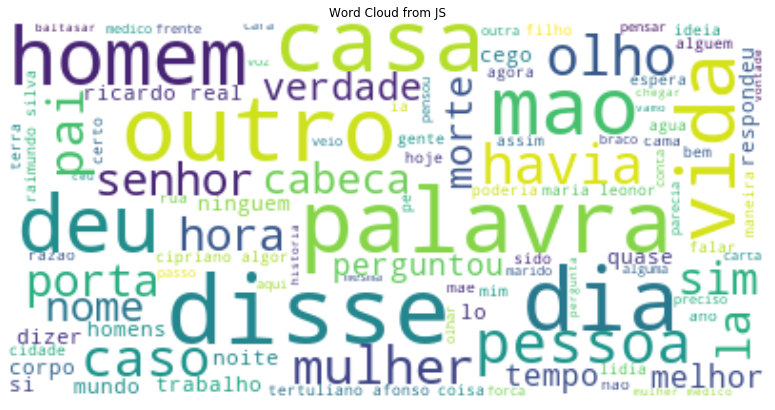

In [121]:
word_cloud('JS','clean')

WILL NEED TO REMOVE STOP WORDS FIRST BEFORE IT MAKES ANY SENSE 

## Testing the Importance of Punctuation

We know that José Saramago has an interesting use of punctuation and it can be a factor in identifying texts from him. Does this mean that we shouldn't consider punctuations as stop-words? Let's test it.

To do so we will use a dummy classifier on two texts from Saramago and two from JRS. Will we see a difference in the performance of the classifier with or without punctuation?

In [122]:
punc_traindf = traindf[traindf.author=='JS'][1:3].append(traindf[traindf.author=='JRS'][1:3])

We will run the dummy classifier n_iter times and determine the difference between the two. If the classifier is better with punctuation we should see a _positive difference_ meaning that the classifier that runs on the text with punctuation should have a better accuracy score than the one without. 

In [123]:
n_iter = 50000
score_punc_test = []
for i in range(0,n_iter):
    score_punc_test.append(dummy_classifier_score(punc_traindf,'clean_with_punc','stratified')-dummy_classifier_score(punc_traindf,'clean','stratified'))
    i += 1
score_punc_test = pd.DataFrame(score_punc_test)

In [124]:
score_punc_test.describe()

,0
count,50000.000000
mean,0.002965
std,0.354073
min,-1.000000
25%,-0.250000
50%,0.000000
75%,0.250000
max,1.000000


There's a very very small change between each classifiers. Which may indicate that there are no difference in the performance of the classifier of JS with or without punctuation. 

To confirm this, let's do a one sided hypothesis test, where the null hypothesis is that the mean of the difference between the scores is zero, meaning there is no difference between doing a classifier with or without punctuation for José Saramago.

In [125]:
from scipy.stats import ttest_1samp

diff_mean = np.mean(score_punc_test)
print('mean', diff_mean)
tset, pval = ttest_1samp(score_punc_test, 0)
print('p-values', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Reject the null hypothesis: there are evidence that the classifier performs differently if there's punctuation")
else:
  print("Do not reject the null hypothesis: there are no evidence that the classifier is better if we mantain the punctuation")

mean 0    0.002965
dtype: float64
p-values [0.06114601]
Do not reject the null hypothesis: there are no evidence that the classifier is better if we mantain the punctuation


## Dividing the text into chunks of 500 words

In [24]:
def split_doc(doc,n):
    newdf = pd.DataFrame()
    newdf = newdf.reindex(columns = ['id','chunks']) 
    for i in tqdm(range(len(doc))):
        text = doc['clean'].iloc[i,]

        text = text.split()

        chunks = [' '.join(text[j:j+n]) for j in range(0,len(text),n)]

        for c in chunks:
            data = []
            values = [doc['id'].iloc[i,], c]
            a_dictionary = dict(zip(newdf.columns.tolist(), values))
            data.append(a_dictionary)
            newdf = newdf.append(data)
            
    newdf.index =[j for j in range(len(newdf))]  
              
    return newdf

In [25]:
chunks = split_doc(traindf,500)

In [27]:
chunks.head(10)

,id,chunks
0,AlmadaNegreiros0.txt,title scena odio author jose almada negreiros ...
1,AlmadaNegreiros0.txt,imenso mesmos prophetas cladestinos naufragio ...
2,AlmadaNegreiros0.txt,pendao piratas corvo marinho beber olhos vesgo...
3,AlmadaNegreiros1.txt,title jardim pierrette author jose almada negr...
4,AlmadaNegreiros2.txt,title invencao dia claro author jose almada ne...
5,AlmadaNegreiros2.txt,tres oleografias trez oleografias explicam sen...
6,AlmadaNegreiros2.txt,sorte teres duvida cabeca cances sorte nao ten...
7,AlmadaNegreiros2.txt,poeta acceitaram tambem pediram fiquei atrapal...
8,AlmadaNegreiros2.txt,bois barro bois verdadeiros gabao jardineiro f...
9,AlmadaNegreiros2.txt,mae irmao extrangeiro infelicidade morreu hont...


## Cross-validation 
We already have a test set defined however there is value in having an evaluation/development set to determine the model performance as it's being trained and to adjust the parameters.

Given the relatively small amount of data we chose to use cross-validation rather than splitting the set into training and evaluation sets.

We will do so by applying the k-fold crossvalidation method, the choice of number of folds k will be decided according to:

"... there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance." - Page 184, An Introduction to Statistical Learning, 2013.

In [126]:
from sklearn.model_selection import KFold
#Creating a k-fold instance where the number of splits is 10
kf = KFold(n_splits=10)

In [127]:
#Using accuracy may have to change
def evaluate_model(X,y, model):
    return model.score(X,y)

<a class="anchor" id="Baseline">

## 2. Creating a Baseline
    
</a>

Our goal now is to create a naíve baseline to compare our model with. It won't involve any pre-processing of data or removal of extra meta data.

#### 1st Try
Using DummyClassifier as a baseline? 

In [211]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [222]:
def dummy_classifier_score(df,text_column,strategy):

    X = df.loc[:,text_column]
    y = df.loc[:,'author']
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    dummy_clf.fit(X, y)
    dummy_clf.predict(X)
    return dummy_clf.score(X, y)

In [223]:
dummy_classifier_score(traindf,'text','most_frequent')

0.31746031746031744

Using a Dummy Classifier inside a crossvalidation k-fold 

In [228]:
#Placeholder dummy classifier
def dummy_classifier_model(X,y,strategy):
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    model = dummy_clf.fit(X, y)
    return model

In [233]:
#For the dummy classifier
def avg_score_DC(method,X,y,strategy):
    score_train = []
    score_eval = []
    for train_index, eval_index in method.split(X):
        X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[eval_index]
        ####Define model:
        model = dummy_classifier_model(X_train,y_train,strategy)
        ###############
        value_train = evaluate_model(X_train, y_train, model)
        value_eval = evaluate_model(X_eval,y_eval, model)
        score_train.append(value_train)
        score_eval.append(value_eval)

    print('Train:', np.mean(score_train))
    print('Evaluation:', np.mean(score_eval))


In [234]:
avg_score_DC(kf,traindf['clean'],traindf['author'],'stratified')

Train: 0.21340852130325816
Evaluation: 0.12142857142857141


Very bad result with dummy classifier as expected. Creating a bag-of-words is probably a better choice: 
#### 2nd Try

In [235]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def bag_of_words_model(X,y):
    count_vect = CountVectorizer(
        max_df=0.8,
        max_features=10000, 
        ngram_range=(1,3)
    )
    
    X_count = count_vect.fit_transform(X)
    #using frequencies instead of occurrences in order to normalize the counts for 
    #documents that are larger compared to smaller ones -term frequency
    #As well as downscaling weights for words that occur in many documntenst in the corpus
    #and are therefore less informative 

    X_train_tfidf =  TfidfTransformer().fit_transform(X_count)
    #Now that we have the features we can train the classifier. 
    #Let's use a naive bayes classsifier in the multinomial variant as it's the most well suited for word counts
    model = MultinomialNB().fit(X_train_tfidf, y)
    return model, X_train_tfidf

In [236]:
def avg_score_baseline(method,X,y):
    #Using Bag-of-Words
    score_train = []
    score_eval = []
    for train_index, eval_index in method.split(X):
        X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[eval_index]
        
        ##Define model:
        model = bag_of_words_model(X_train,y_train)[0]
        
        ##Evaluation of baseline model
        #The evaluate_model functions needs to use the respective X_train with the tfid transformer.
        value_train = evaluate_model(bag_of_words_model(X_train,y_train)[1], y_train, model)
        value_eval = evaluate_model(bag_of_words_model(X_eval,y_eval)[1],y_eval, model)
        
        score_train.append(value_train)
        score_eval.append(value_eval)
        
        ##Average of Evaluation measure
    print('Train:', np.mean(score_train))
    print('Evaluation:', np.mean(score_eval))

In [237]:
avg_score_baseline(kf,traindf['clean'],traindf['author'])

Train: 0.8098684210526315
Evaluation: 0.27380952380952384


In [203]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [204]:
top_df = get_top_n_grams(traindf['clean'], top_k=20, n=1)
top_df

,Ngram,Freq
0,disse,7494
1,nao,6048
2,olhos,4908
3,mao,4907
4,dia,4894
5,homem,4713
6,casa,4588
7,elle,4490
8,senhor,4153
9,mulher,4032


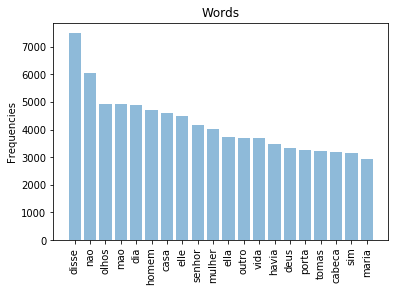

In [205]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()
plot_frequencies(top_df)